<a href="/assets/tutorial09_code.ipynb" class="link-button">Download</a>
<a href="https://colab.research.google.com/github/technion046195/technion046195/blob/master/content/tutorial09/code.ipynb" target="_blank">
<img src="../assets/colab-badge.svg" style="display:inline"/>
</a>

<center><h1>
תרגול 9 - Logistic Regression and Gradient Descent 
</h1></center> 

## Setup

In [ ]:
## Importing packages
import os # A build in package for interacting with the OS. For example to create a folder.
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package
import imageio  # A package to read and write image (is used here to save gif images)
import tabulate  # A package from pretty printing tables
from graphviz import Digraph  # A package for plothing graphs (of nodes and edges)

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

## Setting some nice matplotlib defaults
plt.rcParams['figure.figsize'] = (4.5, 4.5)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Auxiliary function for prining equations, pandas tables and images in cells output
from IPython.core.display import display, HTML, Latex, Markdown

## Create output folder
if not os.path.isdir('./output'):
    os.mkdir('./output')

## EX 7.1

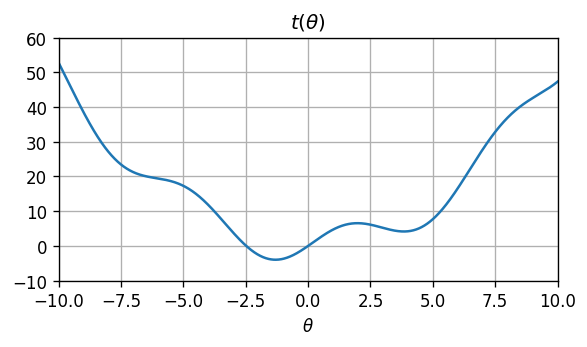

In [ ]:
t = lambda theta: 0.5 * theta ** 2 + 5 * np.sin(theta)
theta_grid = np.arange(-100, 100 + 1e-9, 0.01)

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(theta_grid, t(theta_grid))
ax.set_title(r'$t(\theta)$')
ax.set_xlabel(r'$\theta$')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 60)
plt.tight_layout()
fig.savefig('./output/ex_7_1_objective.png', dpi=240)


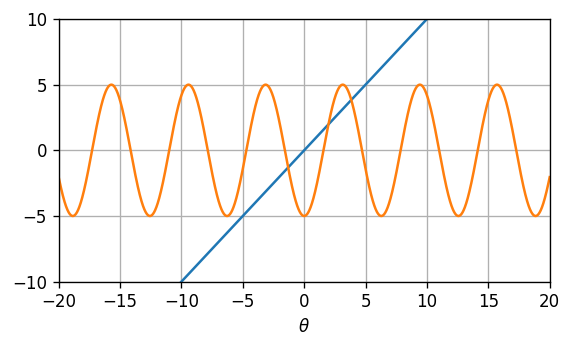

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(theta_grid, theta_grid, label=r'$\theta$')
ax.plot(theta_grid, -5 * np.cos(theta_grid), label=r'$-5\cos(\theta)$')
ax.set_xlabel(r'$\theta$')
ax.set_xlim(-20, 20)
ax.set_ylim(-10, 10)
plt.tight_layout()
fig.savefig('./output/ex_7_1_1_analytic_solution.png', dpi=240)

[ 0.         -0.5        -0.88879128 -1.11508757]


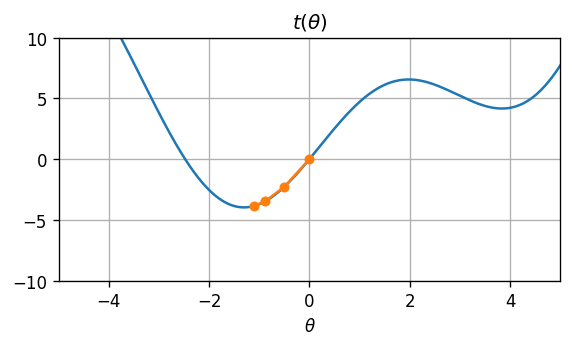

In [ ]:
t_grad = lambda theta: theta + 5 * np.cos(theta)

theta = 0
eta = 0.1


theta_list = [theta]

for _ in range(3):
    theta = theta - eta * t_grad(theta)
    theta_list.append(theta)
theta_list = np.array(theta_list)

print(theta_list)
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(theta_grid, t(theta_grid))
ax.plot(theta_list, t(theta_list), '-o', ms=5)
ax.set_title(r'$t(\theta)$')
ax.set_xlabel(r'$\theta$')
# ax.set_xlim(x_grid.min(), x_grid.max())
# ax.set_ylim(-10, 60)
ax.set_xlim(-5, 5)
ax.set_ylim(-10, 10)
plt.tight_layout()
fig.savefig('./output/ex_7_1_3.png', dpi=240)


[2.5        2.65057181 2.82644061 3.01917118]


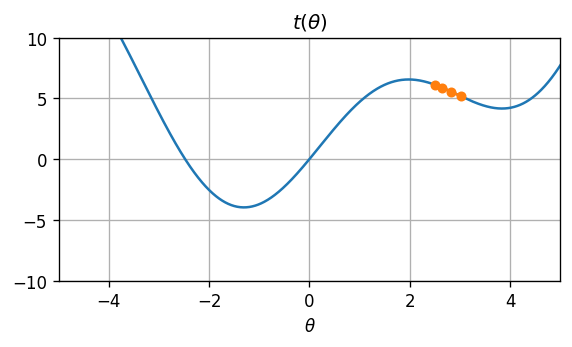

In [ ]:
t_grad = lambda theta: theta + 5 * np.cos(theta)

theta = 2.5
eta = 0.1


theta_list = [theta]

for _ in range(3):
    theta = theta - eta * t_grad(theta)
    theta_list.append(theta)
theta_list = np.array(theta_list)

print(theta_list)
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(theta_grid, t(theta_grid))
ax.plot(theta_list, t(theta_list), '-o', ms=5)
ax.set_title(r'$t(\theta)$')
ax.set_xlabel(r'$\theta$')
ax.set_xlim(-5, 5)
ax.set_ylim(-10, 10)
plt.tight_layout()
fig.savefig('./output/ex_7_1_4.png', dpi=240)

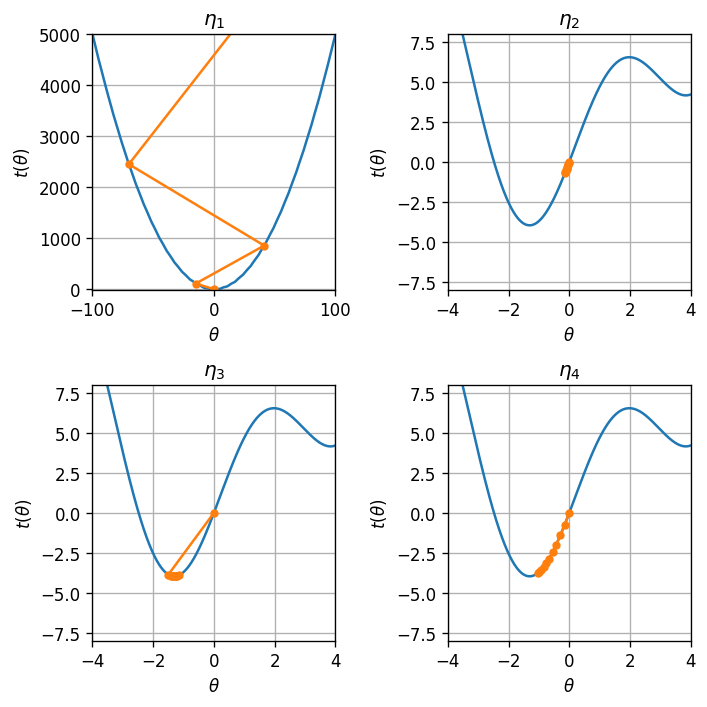

In [ ]:
eta_list = [3, 0.003, 0.3, 0.03]
t_grad = lambda theta: theta + 5 * np.cos(theta)

fig, axes = plt.subplots(2, 2, figsize=(6, 6))

for i_eta, eta in enumerate(eta_list):
    theta = 0
    theta_list = [theta]
    for _ in range(10):
        theta = theta - eta * t_grad(theta)
        theta_list.append(theta)
    theta_list = np.array(theta_list)

    ax = axes.flat[i_eta]
    ax.plot(theta_grid, t(theta_grid))
    ax.plot(theta_list, t(theta_list), '-o', ms=4)
    ax.set_title(r'$\eta_{' + f'{i_eta + 1}' + '}$')
    ax.set_ylabel(r'$t(\theta)$')
    ax.set_xlabel(r'$\theta$')
    ax.set_xlim(-4, 4)
    ax.set_ylim(-8, 8)
    if eta >=2:
        ax.set_xlim(theta_grid.min(), theta_grid.max())
        ax.set_ylim(-10, 5000)
    plt.tight_layout()
fig.savefig('./output/ex_8_1_5.png', dpi=240)